In this notebook we will try to analyse one of the most famous datasets using seaborn, matplotlip and plotly libraries, and we will then use different ML classification algorithmes to classify the type o species based on their petal and sepal width and lenght. 

let's load the required libraries

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 
import numpy as np
import random
import pandas as pd
from pandas.tools import plotting
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


import plotly.offline as py
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
from plotly import tools
init_notebook_mode(connected=True)  
import plotly.figure_factory as ff


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import  accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler, LabelBinarizer

import xgboost as xgb
import lightgbm as  lgb
from xgboost.sklearn import XGBClassifier
from catboost import CatBoostClassifier

import keras
from keras.models import Sequential
from keras.layers import Dense

import warnings
warnings.filterwarnings('ignore')

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))
# Any results you write to the current directory are saved as output.

Using TensorFlow backend.


['Iris.csv', 'database.sqlite']


 Let's begin by importing the Iris dataset, and showing the first 5 rows.

In [2]:
data=pd.read_csv("../input/Iris.csv")
table = ff.create_table(data.head())
py.iplot(table,filename='jupyter-table1')


Let's do some Exploratpory data analysis on this data 

In [3]:
print("the dataset has {} rows and {} features".format(data.shape[0],data.shape[1]))

the dataset has 150 rows and 6 features


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
Id               150 non-null int64
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Species          150 non-null object
dtypes: float64(4), int64(1), object(1)
memory usage: 7.1+ KB


The data types are correct and we can see that there is no null values in the dataset 

we will remove the ID column from the data

In [5]:
data.drop('Id',axis=1,inplace=True)

Let's take a look at the summary statistics

In [6]:
data.describe()
#py.iplot(ff.create_table(data.describe()),filename='describe_table')

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [7]:
print(" we have {} types of species in this dataset".format(data.Species.nunique()))
print("the names of this species are:",data.Species.unique())

 we have 3 types of species in this dataset
the names of this species are: ['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


In [8]:
data.Species.value_counts()

Iris-versicolor    50
Iris-setosa        50
Iris-virginica     50
Name: Species, dtype: int64

So we have equally distributed species all are of 50

Let's visualize the data with a scatter plots based on Sepal and Petal width and lenght

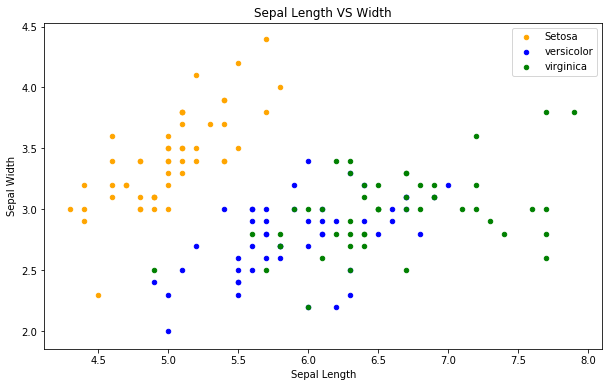

In [9]:
fig = data[data.Species=='Iris-setosa'].plot(kind='scatter',x='SepalLengthCm',y='SepalWidthCm',color='orange', label='Setosa')
data[data.Species=='Iris-versicolor'].plot(kind='scatter',x='SepalLengthCm',y='SepalWidthCm',color='blue', label='versicolor',ax=fig)
data[data.Species=='Iris-virginica'].plot(kind='scatter',x='SepalLengthCm',y='SepalWidthCm',color='green', label='virginica', ax=fig)
fig.set_xlabel("Sepal Length")
fig.set_ylabel("Sepal Width")
fig.set_title("Sepal Length VS Width")
fig=plt.gcf()
fig.set_size_inches(10,6)
plt.show()

we can clearly see that sepal characteristics differentiate setosa but not versicolor and virginica 

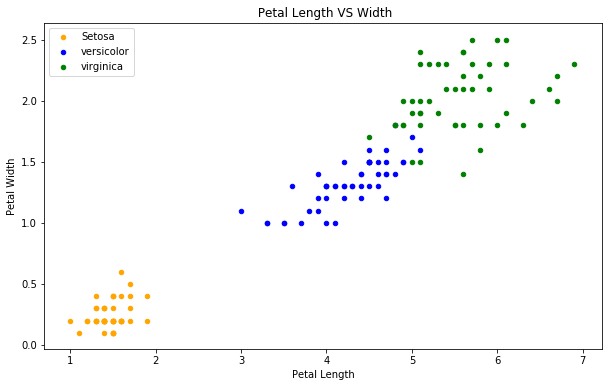

In [10]:
fig = data[data.Species=='Iris-setosa'].plot.scatter(x='PetalLengthCm',y='PetalWidthCm',color='orange', label='Setosa')
data[data.Species=='Iris-versicolor'].plot.scatter(x='PetalLengthCm',y='PetalWidthCm',color='blue', label='versicolor',ax=fig)
data[data.Species=='Iris-virginica'].plot.scatter(x='PetalLengthCm',y='PetalWidthCm',color='green', label='virginica', ax=fig)
fig.set_xlabel("Petal Length")
fig.set_ylabel("Petal Width")
fig.set_title(" Petal Length VS Width")
fig=plt.gcf()
fig.set_size_inches(10,6)
plt.show()

With Petal characteristics we can easily classify the species but there is a little thin line between the virginica and versicolor

Let's check the distribution of each column

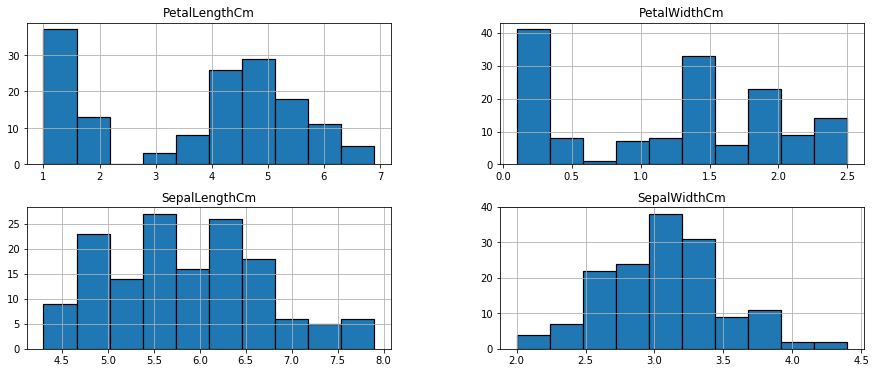

In [11]:
data.hist(edgecolor='black', linewidth=1.2)
fig=plt.gcf()
fig.set_size_inches(15,6)
plt.show()

Let's take a look at the Probability Density

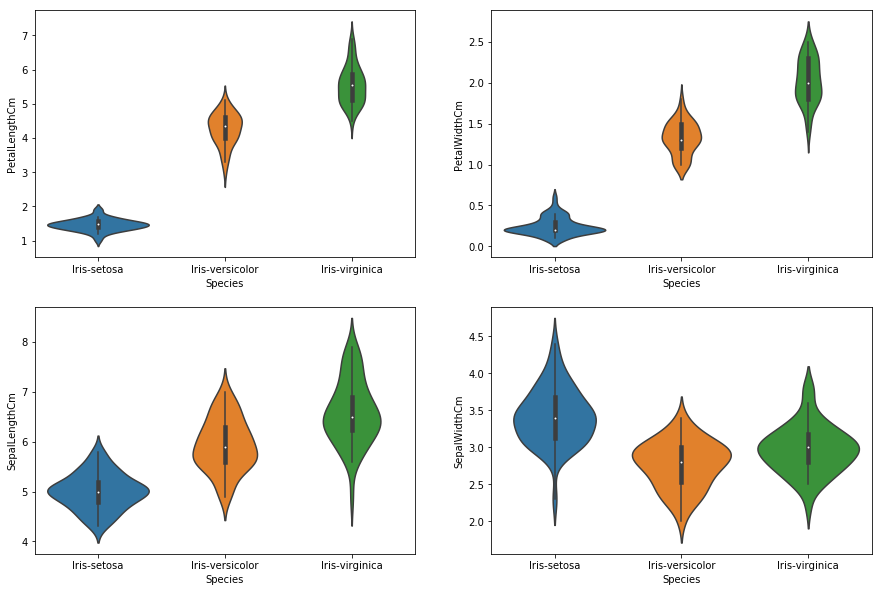

In [12]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.violinplot(x='Species',y='PetalLengthCm',data=data)
plt.subplot(2,2,2)
sns.violinplot(x='Species',y='PetalWidthCm',data=data)
plt.subplot(2,2,3)
sns.violinplot(x='Species',y='SepalLengthCm',data=data)
plt.subplot(2,2,4)
sns.violinplot(x='Species',y='SepalWidthCm',data=data)


On each side of the gray line is a kernel density estimation to show the distribution shape of the data.
the skinnier sections represent a lower probability.

Andrews curves are a method for visualizing multidimensional data by mapping each observation onto a function.

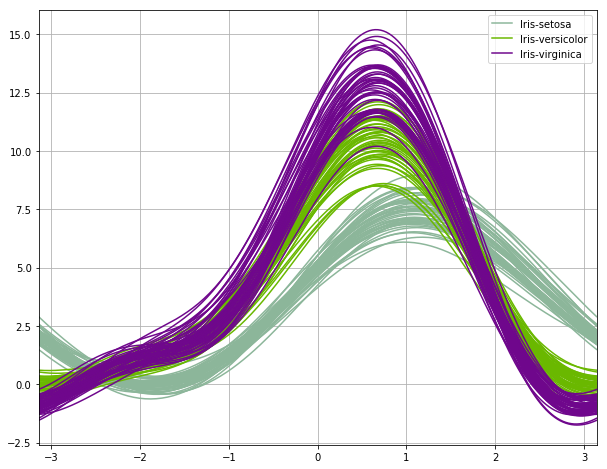

In [13]:
plt.figure(figsize=(10,8))
plotting.andrews_curves(data,'Species')

In the plot above, the each color used represents a class and we can easily note that the lines that represent samples from the same class have similar curves.


Let's check if we have any correlation between features 

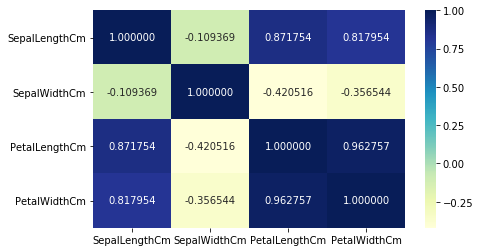

In [14]:
plt.figure(figsize=(7,4)) 
sns.heatmap(data.corr(),annot=True,fmt="f",cmap="YlGnBu")
plt.show()

we have a strong correlation between Petal Width and Petal length , and also between Petal characteristics and Sepal Length.

Let's create a regression plot for both petal and sepal

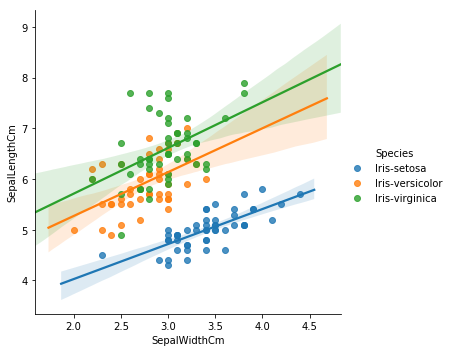

In [15]:
sns.lmplot(x="SepalWidthCm", y="SepalLengthCm",hue="Species",data=data)

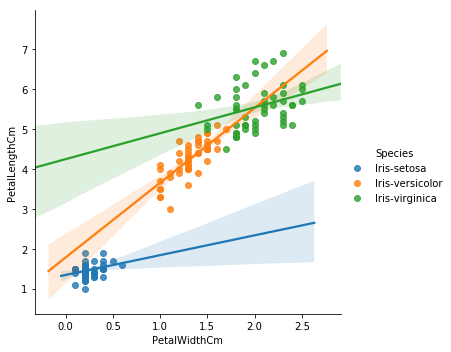

In [16]:
sns.lmplot(x="PetalWidthCm", y="PetalLengthCm",hue="Species",data=data)

**Let's now build our classification algorithmes**

we will split the dataset into training and testing data

In [17]:
X_train, X_test, y_train,y_test = train_test_split(data.iloc[:,:4],data.Species,stratify=data.Species,test_size = 0.3)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(105, 4)
(45, 4)
(105,)
(45,)


In [18]:
X_train.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
30,4.8,3.1,1.6,0.2
49,5.0,3.3,1.4,0.2
9,4.9,3.1,1.5,0.1
45,4.8,3.0,1.4,0.3
88,5.6,3.0,4.1,1.3


In [19]:
y_train.head()

30        Iris-setosa
49        Iris-setosa
9         Iris-setosa
45        Iris-setosa
88    Iris-versicolor
Name: Species, dtype: object

In [20]:
SVC=SVC()
SVC.fit(X_train,y_train)
SVC_prediction=SVC.predict(X_test)
print("the accuracy of the Support Vector Machine Classifier model is :",accuracy_score(y_test,SVC_prediction))
confusion_matrix(SVC_prediction,y_test)

the accuracy of the Support Vector Machine Classifier model is : 0.9777777777777777


array([[15,  0,  0],
       [ 0, 14,  0],
       [ 0,  1, 15]])

In [21]:
LG=LogisticRegression()
LG.fit(X_train,y_train)
LG_prediction=LG.predict(X_test)
print("the accuracy of the Logistic Regression model is :",accuracy_score(LG_prediction,y_test))
confusion_matrix(LG_prediction,y_test)

the accuracy of the Logistic Regression model is : 0.9333333333333333


array([[15,  0,  0],
       [ 0, 12,  0],
       [ 0,  3, 15]])

In [22]:
DTC=DecisionTreeClassifier(max_leaf_nodes=3)
DTC.fit(X_train,y_train)
DTC_prediction=DTC.predict(X_test)
print('The accuracy of the Decision Tree Classifier model is',accuracy_score(DTC_prediction,y_test))
confusion_matrix(DTC_prediction,y_test)

The accuracy of the Decision Tree Classifier model is 0.9777777777777777


array([[15,  0,  0],
       [ 0, 14,  0],
       [ 0,  1, 15]])

In [23]:
ETC=ExtraTreesClassifier()
ETC.fit(X_train,y_train)
ETC_prediction=ETC.predict(X_test)
print('The accuracy of the Extra Trees Classifier model is',accuracy_score(ETC_prediction,y_test))
confusion_matrix(ETC_prediction,y_test)

The accuracy of the Extra Trees Classifier model is 0.9777777777777777


array([[15,  0,  0],
       [ 0, 14,  0],
       [ 0,  1, 15]])

In [24]:
KNN=KNeighborsClassifier(n_neighbors=3)
KNN.fit(X_train,y_train)
KNN_prediction=KNN.predict(X_test)
print('The accuracy of the KNeighborsClassifier model is',accuracy_score(KNN_prediction,y_test))
confusion_matrix(KNN_prediction,y_test)

The accuracy of the KNeighborsClassifier model is 0.9777777777777777


array([[15,  0,  0],
       [ 0, 14,  0],
       [ 0,  1, 15]])

In [25]:
GNB=GaussianNB()
GNB.fit(X_train,y_train)
GNB_prediction=GNB.predict(X_test)
print('The accuracy of the GaussionNB model is',accuracy_score(GNB_prediction,y_test))
confusion_matrix(GNB_prediction,y_test)

The accuracy of the GaussionNB model is 0.9777777777777777


array([[15,  0,  0],
       [ 0, 14,  0],
       [ 0,  1, 15]])

In [26]:
RFC=RandomForestClassifier()
RFC.fit(X_train,y_train)
RFC_prediction=RFC.predict(X_test)
print('The accuracy of the RandomForestClassifier model is',accuracy_score(RFC_prediction,y_test))
confusion_matrix(RFC_prediction,y_test)

The accuracy of the RandomForestClassifier model is 0.9777777777777777


array([[15,  0,  0],
       [ 0, 14,  0],
       [ 0,  1, 15]])

In [27]:
XGB=XGBClassifier()
XGB.fit(X_train,y_train)
XGB_prediction=XGB.predict(X_test)
print('The accuracy of the XGBClassifier model is',accuracy_score(XGB_prediction,y_test))
confusion_matrix(XGB_prediction,y_test)

The accuracy of the XGBClassifier model is 0.9777777777777777


array([[15,  0,  0],
       [ 0, 14,  0],
       [ 0,  1, 15]])

In [28]:
LGB=LGBMClassifier()
LGB.fit(X_train,y_train)
LGB_prediction=LGB.predict(X_test)
print('The accuracy of the LGBMClassifier model is',accuracy_score(LGB_prediction,y_test))
confusion_matrix(LGB_prediction,y_test)

The accuracy of the LGBMClassifier model is 0.9777777777777777


array([[15,  0,  0],
       [ 0, 14,  0],
       [ 0,  1, 15]])

In [29]:
CBC=CatBoostClassifier()
CBC.fit(X_train,y_train)
CBC_prediction=CBC.predict(X_test)
print('The accuracy of the CatBoostClassifier model is',accuracy_score(CBC_prediction,y_test))
confusion_matrix(CBC_prediction,y_test)

0:	learn: 1.0683404	total: 51.8ms	remaining: 51.7s
1:	learn: 1.0386301	total: 54.8ms	remaining: 27.3s
2:	learn: 1.0119224	total: 57.1ms	remaining: 19s
3:	learn: 0.9846588	total: 59.4ms	remaining: 14.8s
4:	learn: 0.9549406	total: 61.8ms	remaining: 12.3s
5:	learn: 0.9292212	total: 64ms	remaining: 10.6s
6:	learn: 0.8980687	total: 64.9ms	remaining: 9.2s
7:	learn: 0.8742166	total: 66.8ms	remaining: 8.29s
8:	learn: 0.8520552	total: 69.1ms	remaining: 7.61s
9:	learn: 0.8301667	total: 71.2ms	remaining: 7.05s
10:	learn: 0.8082008	total: 73.1ms	remaining: 6.57s
11:	learn: 0.7855317	total: 75.2ms	remaining: 6.19s
12:	learn: 0.7646604	total: 77.1ms	remaining: 5.85s
13:	learn: 0.7458765	total: 79.1ms	remaining: 5.57s
14:	learn: 0.7292512	total: 80.9ms	remaining: 5.31s
15:	learn: 0.7113171	total: 82.8ms	remaining: 5.09s
16:	learn: 0.6928093	total: 85.5ms	remaining: 4.94s
17:	learn: 0.6801563	total: 87.6ms	remaining: 4.78s
18:	learn: 0.6647719	total: 90.1ms	remaining: 4.65s
19:	learn: 0.6488992	total:

array([[15,  0,  0],
       [ 0, 14,  0],
       [ 0,  1, 15]])

Let's try to build a Deep Learning Model with Keras

In [30]:
from sklearn.preprocessing import StandardScaler, LabelBinarizer
X = data[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]
y = data['Species']

X = StandardScaler().fit_transform(X)
y = LabelBinarizer().fit_transform(y)

In [31]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 101)

In [32]:
model = Sequential()
model.add(Dense( 4, input_dim=4, activation = 'relu'))
model.add(Dense( units = 10, activation= 'relu'))
model.add(Dense( units = 3, activation= 'softmax'))
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [33]:
model_training = model.fit(x_train, y_train, epochs = 150, validation_data = (x_test, y_test))


Train on 105 samples, validate on 45 samples
Epoch 1/150
105/105 [==============================] - 0s 4ms/step - loss: 0.7218 - acc: 0.5746 - val_loss: 0.6946 - val_acc: 0.6000
Epoch 2/150
105/105 [==============================] - 0s 93us/step - loss: 0.7091 - acc: 0.5810 - val_loss: 0.6851 - val_acc: 0.6074
Epoch 3/150
105/105 [==============================] - 0s 94us/step - loss: 0.6975 - acc: 0.5873 - val_loss: 0.6761 - val_acc: 0.6148
Epoch 4/150
105/105 [==============================] - 0s 85us/step - loss: 0.6858 - acc: 0.5905 - val_loss: 0.6673 - val_acc: 0.6148
Epoch 5/150
105/105 [==============================] - 0s 79us/step - loss: 0.6742 - acc: 0.5905 - val_loss: 0.6591 - val_acc: 0.6296
Epoch 6/150
105/105 [==============================] - 0s 77us/step - loss: 0.6642 - acc: 0.5905 - val_loss: 0.6513 - val_acc: 0.6370
Epoch 7/150
105/105 [==============================] - 0s 78us/step - loss: 0.6546 - acc: 0.6032 - val_loss: 0.6437 - val_acc: 0.6444
Epoch 8/150
105/10